In [59]:
# подключаем библиотеки
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from urllib.parse import urlparse
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [60]:
url = 'https://drive.google.com/file/d/1LBDnhITL0Wqwp5G6M6IBI-SSz8BIoNec/view'

In [61]:
parts = urlparse(url)
parts

ParseResult(scheme='https', netloc='drive.google.com', path='/file/d/1LBDnhITL0Wqwp5G6M6IBI-SSz8BIoNec/view', params='', query='', fragment='')

In [62]:
url = 'https://drive.google.com/file/d/1LBDnhITL0Wqwp5G6M6IBI-SSz8BIoNec/view'
url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]
dataset = pd.read_csv(url)

In [63]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [64]:
# загружаем набор данных
X = dataset.iloc[:, :-1].values 
y = dataset.iloc[:, 8].values  

sc = StandardScaler()
X_std = sc.fit_transform(X)

In [65]:
# строим ковариационную матрицу
cov_mat = np.cov(X_std.T)

# находим собственные вектора и собственные значения
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i]) for i in range(len(eigen_vals))]

eigen_pairs.sort(key=lambda k: k[0], reverse=True)

w1 = eigen_pairs[0][1]
w2 = eigen_pairs[1][1]

In [66]:
W = np.stack([w1, w2], axis=1)
X_pca = X_std @ W

X_pca

array([[-1.06850273, -1.23489499],
       [ 1.12168331,  0.73385167],
       [ 0.39647671, -1.59587594],
       ...,
       [ 0.28347525, -0.09706503],
       [ 1.06032431, -0.83706234],
       [ 0.83989172,  1.15175485]])

In [67]:
from sklearn.decomposition import PCA

X_pca = PCA(n_components=2, random_state=42).fit_transform(X_std) 

In [68]:
# применяем LDA
lda = LinearDiscriminantAnalysis(n_components=1, solver='svd')
X_lda = lda.fit_transform(X, y)

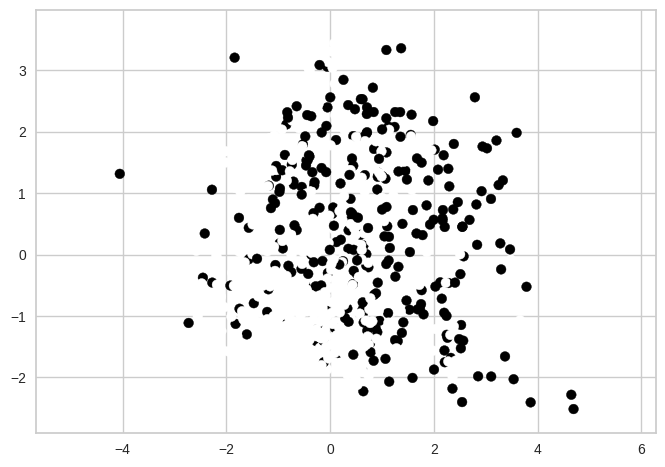

In [69]:
# выводим результат по PCA
plt.scatter(X_pca[:,0], X_pca[:,1], c=y)

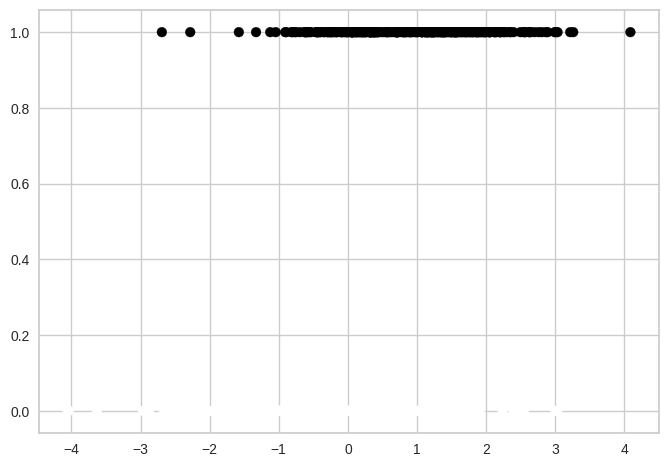

In [71]:
# выводим результат по LDA
plt.scatter(X_lda[:,0], y, c=y)

In [72]:
# подключаем библиотеки
from sklearn.decomposition import TruncatedSVD

# масштабируем
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

# применяем PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# применяем Truncate SVD
svd = TruncatedSVD(n_components=2, algorithm='randomized',
                   random_state=0)
X_svd = svd.fit_transform(X_scaled)

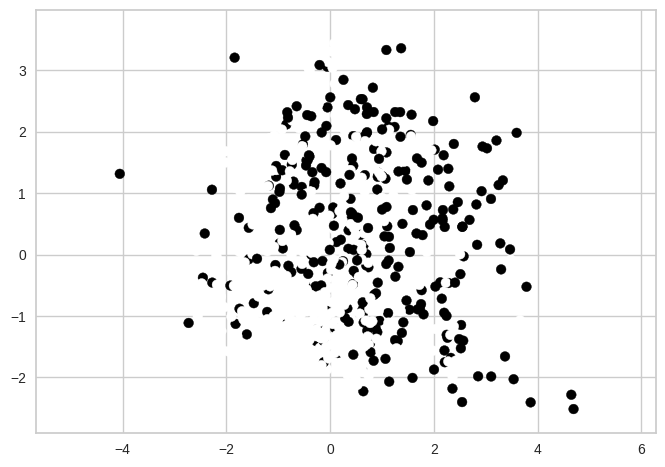

In [73]:
# выводим результат по Truncate SVD
plt.scatter(X_svd[:,0], X_svd[:,1], c=y)

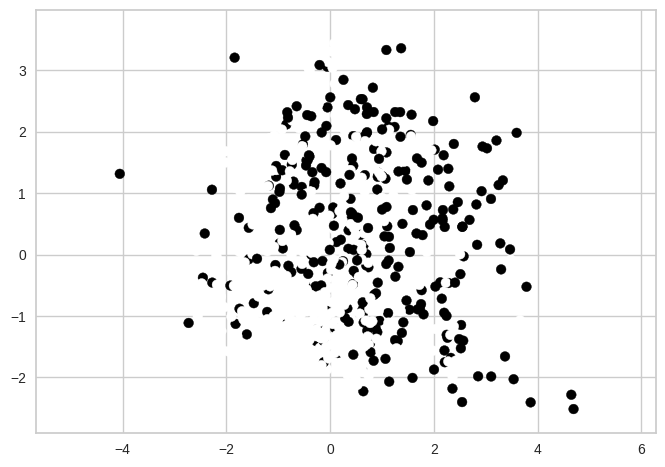

In [74]:
# выводим результат по PCA
plt.scatter(X_pca[:,0], X_pca[:,1], c=y)

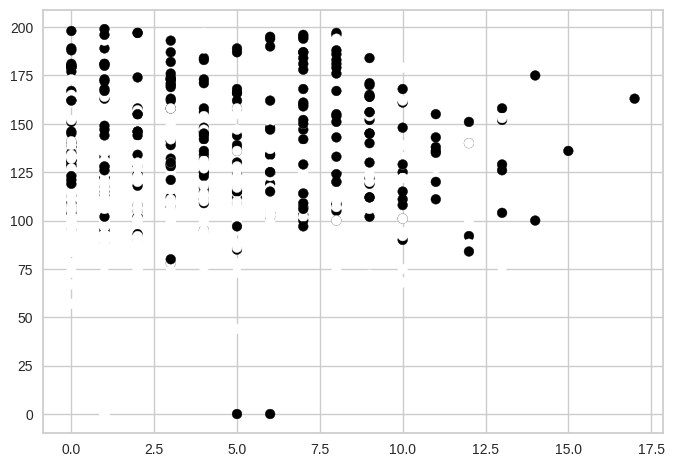

In [75]:
# работа с нелинейностью
# подключаем библиотеки
import matplotlib.pyplot as plt

# загружаем dataset
plt.scatter(X[:, 0], X[:, 1], c=y)

In [76]:
# подключаем библиотеки
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# выбираем ядровые функции ('linear', 'poly', 'rbf', 'sigmoid', 'cosine', 'precomputed')
kpca = KernelPCA(n_components=2, kernel='linear', 
                 gamma=15, random_state=42)
X_kpca = kpca.fit_transform(X)

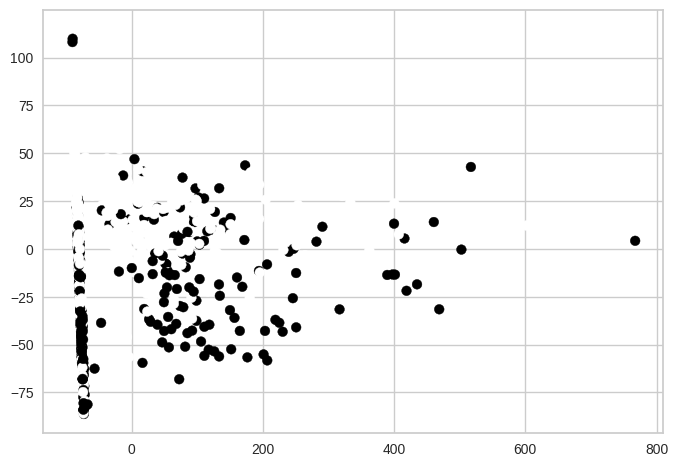

In [77]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)

In [78]:
kpca = KernelPCA(n_components=2, kernel='rbf', 
                 gamma=15, random_state=42)
X_kpca = kpca.fit_transform(X)

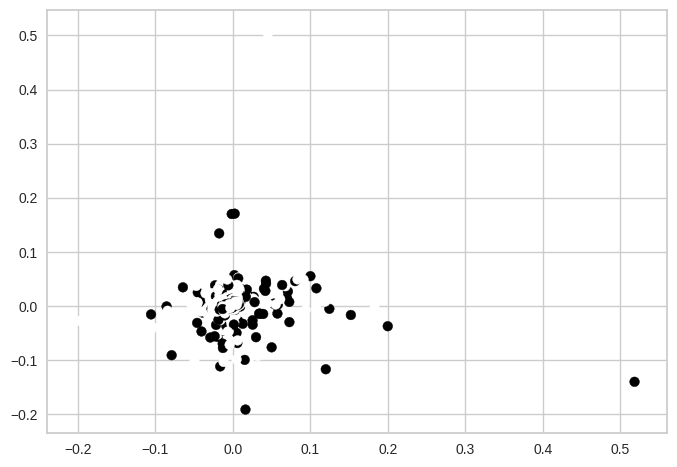

In [79]:
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=y)

In [80]:
kpca = KernelPCA(n_components=2, kernel='poly', 
                 gamma=15, random_state=42)
X_kpca = kpca.fit_transform(X)

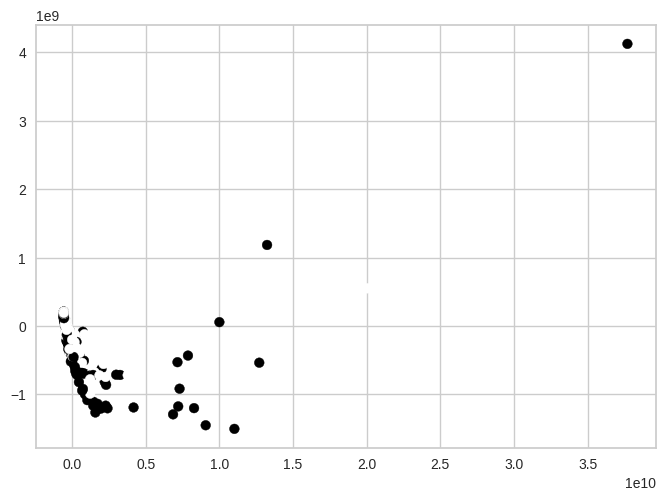

In [81]:
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=y)

In [82]:
kpca = KernelPCA(n_components=2, kernel='sigmoid', 
                 gamma=15, random_state=42)
X_kpca = kpca.fit_transform(X)

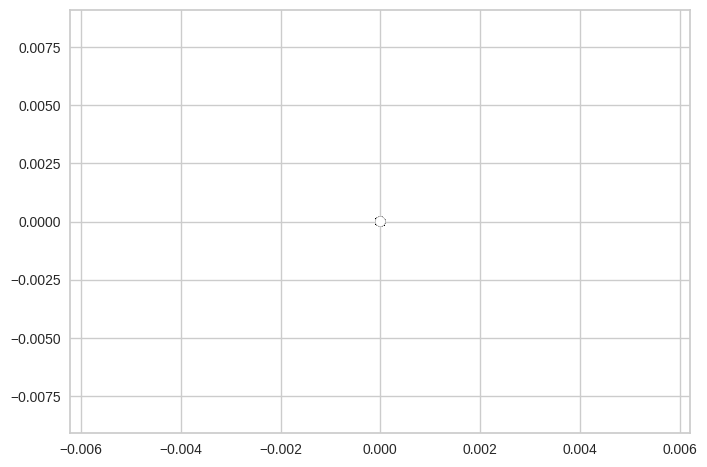

In [83]:
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=y)

In [84]:
kpca = KernelPCA(n_components=2, kernel='cosine', 
                 gamma=15, random_state=42)
X_kpca = kpca.fit_transform(X)

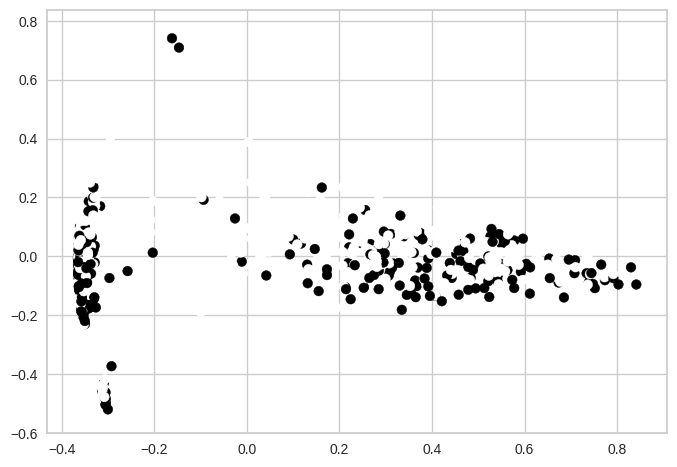

In [85]:
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=y)

In [91]:
def linear_kernel(X, Y):
    return X.dot(Y.T)

gram = linear_kernel(X, X)

In [92]:
kpca1 = KernelPCA(n_components=3, kernel='precomputed', 
                 gamma=15, random_state=42)
X_kpca1 = kpca1.fit_transform(gram)

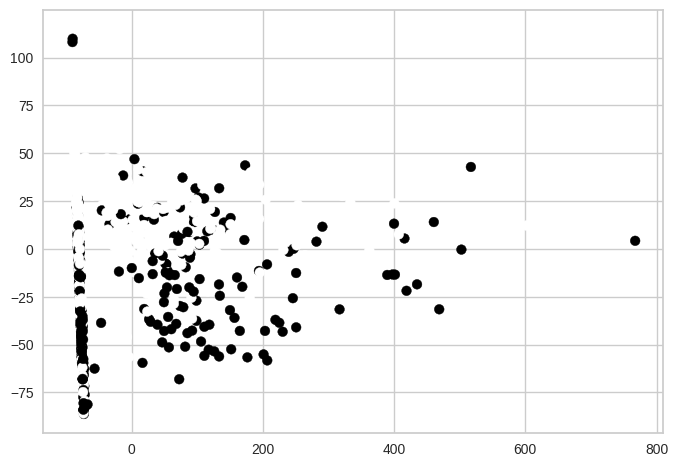

In [93]:
plt.scatter(X_kpca1[:, 0], X_kpca1[:, 1], c=y)